In [12]:
import pandas as pd
import psycopg2

from datetime import datetime

In [3]:
conn = psycopg2.connect(database='hackathon2020_dev', user="postgres", password="Allo123!", host="127.0.0.1", port="5432")

df_per_state = pd.read_sql_query("SELECT * FROM public.state_temperatures",con=conn,index_col=['id'])
df_per_state.head()

,recordedAt,averageTemperature,averageTemperatureUncertainty,state,country,created_at,updated_at
id,,,,,,,
390704,1855-05-01,25.54,1.17,Acre,Brazil,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
390705,1855-06-01,24.23,1.10,Acre,Brazil,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
390706,1855-07-01,24.37,1.04,Acre,Brazil,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
390707,1855-08-01,25.43,1.07,Acre,Brazil,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
390708,1855-09-01,25.68,1.01,Acre,Brazil,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241


In [4]:
df_per_country = pd.read_sql_query("SELECT * FROM public.country_temperatures",con=conn,index_col=['id'])
df_per_country.head()

,recordedAt,averageTemperature,averageTemperatureUncertainty,country,created_at,updated_at
id,,,,,,
575042,1743-11-01,4.38,2.29,Åland,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
575043,1743-12-01,NaN,NaN,Åland,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
575044,1744-01-01,NaN,NaN,Åland,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
575045,1744-02-01,NaN,NaN,Åland,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
575046,1744-03-01,NaN,NaN,Åland,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241


In [8]:
df_per_country = df_per_country[df_per_country['averageTemperature'] != 'Nan']
df_usa = df_per_country[df_per_country['country'] == 'United States']

In [9]:
df_usadf_usa.head()

,recordedAt,averageTemperature,averageTemperatureUncertainty,country,created_at,updated_at
id,,,,,,
1127501,1768-09-01,15.42,2.88,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
1127502,1768-10-01,8.16,3.39,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
1127503,1768-11-01,1.59,3.78,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
1127504,1768-12-01,-2.88,4.98,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241
1127505,1769-01-01,-3.95,4.86,United States,2021-12-20 15:34:56.987241,2021-12-20 15:34:56.987241


<AxesSubplot:xlabel='recordedAt'>

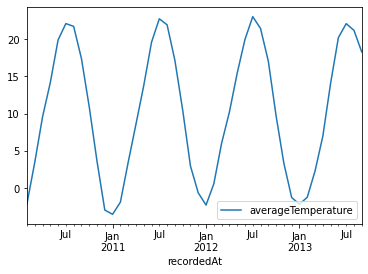

In [24]:
df_usa_recent = df_usa.query('20100101 < recordedAt')

df_usa_recent.head()


df_usa_recent.plot(x='recordedAt', y='averageTemperature')